# Purpose:

In this study, we will be using the housing dataset from the U.C. Irvine machine learning repository website. This housing dataset contains 14 different variables regarding the housing market in Boston, U.S.A. In this analysis, we will investigate the outliers in this dataset.

# Step One:

With the following python commands, we import some necessary python libraries for this analysis.

In [1]:
import os
import pandas as pd
import numpy as np

import urllib
from urllib.request import urlretrieve

To see the current working directory, we use following python command.

In [2]:
print(os.getcwd())

C:\Users\Owner\Desktop\Housing


### Importing housing dataset:


We import housing dataset from our current working directory with the following python command.

In [3]:
housing = pd.read_table('housing.txt', header = None, sep = '\s+', engine = 'python')

This housing dataset does not contain column labels, so we create column names with the following python command.

In [4]:
housing_col = ['crime_rate', 'land_zone', 'non_retail', 'charles_river', 'nox', 'rooms', 'age', 'distance', 
               'radial_high', 'tax', 'PTratio', 'black', 'Lstatus', 'Medvalue']

With with following python command, we add above column labels to the housing dataset and print first five rows with the head function.

In [5]:
housing.columns = housing_col
housing.head()

,crime_rate,land_zone,non_retail,charles_river,nox,rooms,age,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Python libraries for plotting:

- matplotlib.pyplot library is for producing the plots.

- seaborn library is for making the plots are more amiable.

- matplotlib inline library is for making the plots visible.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# Step Two:

We are going to use scatterplots to see the relationship between the features and the response variable.

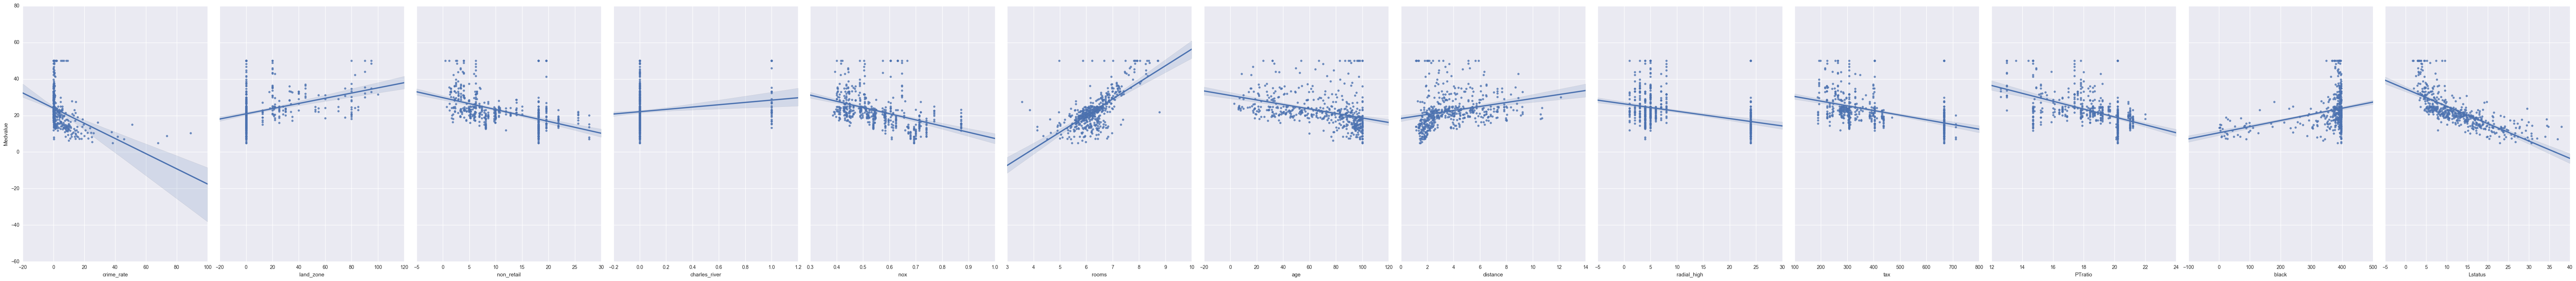

In [7]:
sns.pairplot(housing, x_vars = ['crime_rate', 'land_zone', 'non_retail', 'charles_river', 
                                'nox', 'rooms', 'age', 'distance', 'radial_high', 'tax', 
                                'PTratio', 'black', 'Lstatus',], y_vars = 'Medvalue', 
                                 size = 8, aspect = 0.7, kind = 'reg');

### Libraries for statistics:
For the purpose of regression analysis, we import following python libraries; stats library is generally for performing statistical analysis and ols library is for specifically performing ordinary least square regression analysis.

In [8]:
from scipy import stats
from statsmodels.formula.api import ols

### Regression Model Selection:

We will employ the backwards elemination method model selection for this analysis; our goal is obtaining the parsimonious model. 

### Full model:

This model contains all posible features in the dataset.

In [9]:
model = ols("Medvalue ~ crime_rate + land_zone + non_retail + charles_river + nox + \
            rooms + age + distance + radial_high + tax + PTratio + black + Lstatus", 
            housing).fit()

### Model without age feature:

The age variable is removed since its p-value is highest.

In [10]:
model1 = ols("Medvalue ~ crime_rate + land_zone + non_retail + charles_river + nox + rooms + \
            distance + radial_high + tax + PTratio + black + Lstatus", housing).fit()

### Model without age and non-retail features:

In this we have also removed non-retail feature from the model addition to the age feature; this is because according ot the preceding model that non-retail has a highest p-value.

In [11]:
model2 = ols("Medvalue ~ crime_rate + land_zone + charles_river + nox + rooms + \
            distance + radial_high + tax + PTratio + black + Lstatus", housing).fit()

We slice out the fitted values and the residuals with the following python command.

In [12]:
pred = model2.fittedvalues
resid = model2.resid

# Step Three:

### Histograms:

We plot histograms of median housing values, fitted values, and residuals with the following python commands.

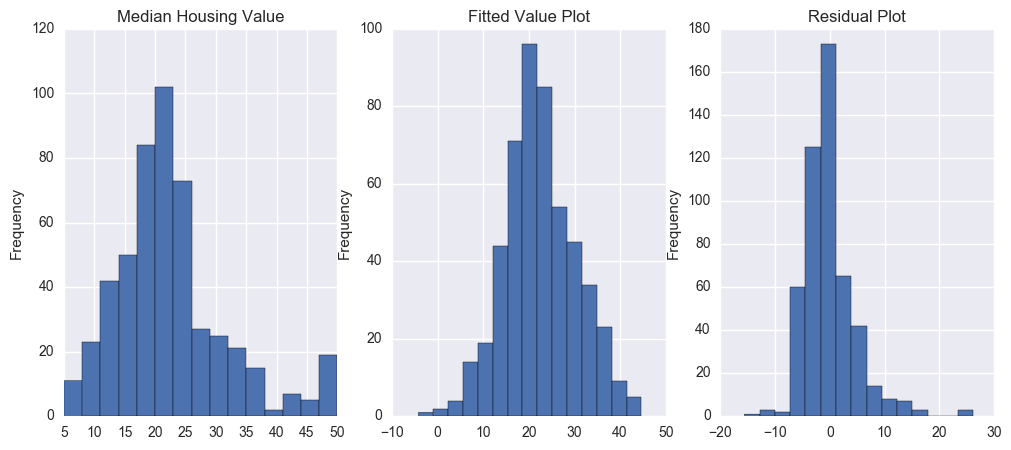

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

housing.Medvalue.plot(kind = 'hist', bins = 15, ax = ax1)
ax1.set_title('Median Housing Value')

pred.plot(kind = 'hist', bins = 15, ax = ax2)
ax2.set_title('Fitted Value Plot')

resid.plot(kind = 'hist', bins = 15, ax = ax3)
ax3.set_title('Residual Plot');

### Interpretation of the first histogram from the left:

1. The values of the median house lie within 1 to 50 range. 

2. The most frequent value of this histogram is in bin 6 (x-axis = 22) and least frequent value is in bin 12 (x-axis = 40).

3. This is a right tailed histogram; meaning that the mean of the median house price is higher than the median.

4. The distribution of median house price is somewhat skewed to the right.

### Interpretation of the middle histogram of the fitted value:

1. The values of the predicted median house lie within -5 to 45 range. 

2. The most frequent value of this histogram is in bin 8 (x-axis = 20) and least frequent value is in bin 1 (x-axis =  -3).

3. The distribution of the predicted median house price is approximately normal.

### Interpretation of the histogram of the Residuals:

1. The values of the predicted median house lie within -17 to 28 range. 

2. The most frequent value of this histogram is in bin 6 (x-axis = 0) and the least frequent value is in bin 1 (x-axis = -15).

3. A bin 15 stands on the x-axis value around 25, this bin is detached from the rest of the bins; so the values in this bin 15 are considered extreme; the outliers!  

3. The distribution of residuals is skewed to the right.

### Normal probability plots:

We use following python commands for plotting the normal probability plots.

In [14]:
import pylab

import scipy.stats as stats

Plotting a normal probability plot for predicted values and residuals, we use following python modual.

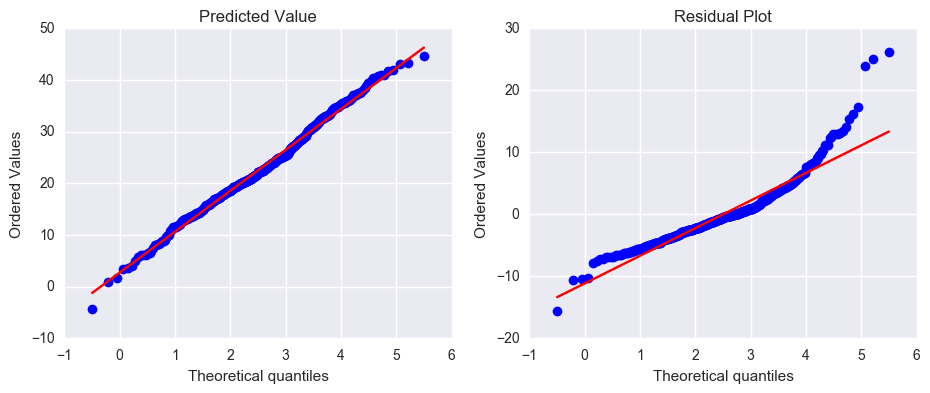

In [15]:
fig = plt.figure(figsize = (11, 4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(pred, dist = 'norm', plot = ax, sparams = (2.5, ))
ax.set_title('Predicted Value')

stats.probplot(resid, dist = 'norm', plot = ax1, sparams = (2.5, ))
ax1.set_title('Residual Plot');

Since all the predicted values are very closely squeezed to the line of best fit, the red line; the distribution of the predicted value is normal. This result agrees with the preceding histogram of the predicted values.

Since some of the residuals deviate from the line of best fit, the red line, the distribution of the residuals is not normal; in fact, it is skewed to the right. This result agrees with the preceding histogram of the residuals.

### Dealing with outliers:

We will study those values which deviate from the fitted line.

### Detection of Outliers:

An outlier is considered to be any value that lies more than 1.5 times the IQR above the 75th percentile or below the 25th percentile. The following python commands will produce lower and upper boundaries of the outliers. 

In [16]:
IQR = resid.quantile(.75) - resid.quantile(.25)
lower = resid.quantile(0.25) - 1.5*IQR
lower

-9.4374408561818726

In [17]:
upper = resid.quantile(0.75) + 1.5*IQR
upper

8.4260811282737951

Any residual values below -9.44 and above 8.43 are considered outliers.

The first line of the following python command selects only the columns included in the final model and called this object, df. The second and fourth line creates objects (fitvalue, residual) of the fitted values and the residuals. Third and fifth line attachs these objects to the dataframe, df.

In [18]:
df = housing.iloc[:, [0,1,3,4,5,7,8,9,10,11,12,13]].copy()
fitvalue = model2.fittedvalues
df['predvalue'] = fitvalue
residual = model2.resid
df['residual'] = residual

The following python command sorts out df according to the residual values and prints first five rows with the head function.

In [19]:
df.sort_values('residual', axis = 0, ascending = True, inplace = True)
df.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
364,3.47428,0.0,1,0.718,8.780,1.9047,24,666.0,20.2,354.55,5.29,21.9,37.498350,-15.598350
401,14.23620,0.0,0,0.693,6.343,1.5741,24,666.0,20.2,396.90,20.32,7.2,17.815830,-10.615830
505,0.04741,0.0,0,0.573,6.030,2.5050,1,273.0,21.0,396.90,7.88,11.9,22.340843,-10.440843
375,19.60910,0.0,0,0.671,7.313,1.3163,24,666.0,20.2,396.90,13.44,15.0,25.283129,-10.283129
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933


We can also print out last five rows of the data frame df, with the tail function.

In [20]:
df.tail()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
412,18.81100,0.0,0,0.597,4.628,1.5539,24,666.0,20.2,28.79,34.37,17.9,1.736475,16.163525
369,5.66998,0.0,1,0.631,6.683,1.3567,24,666.0,20.2,375.33,3.73,50.0,32.626363,17.373637
372,8.26725,0.0,1,0.668,5.875,1.1296,24,666.0,20.2,347.88,8.88,50.0,26.023007,23.976993
371,9.23230,0.0,0,0.631,6.216,1.1691,24,666.0,20.2,366.15,9.53,50.0,24.910039,25.089961
368,4.89822,0.0,0,0.631,4.970,1.3325,24,666.0,20.2,375.52,3.26,50.0,23.762701,26.237299


# Step Four:

Clearly, we see there are outliers in this dataset. We are going to exclude these extreme values from our dataset, df, with the following python commands.

In [21]:
residtrim = df[(df.residual > lower) & (df.residual < upper)].copy()
residtrim.shape

(478, 14)

In this trimed dataset, residtrim has 478 rows and 14 columns; 28 rows are removed from the df data frame.

### Trimed dataset:

We use head function to see the first five rows of the trimed dataset.

In [22]:
residtrim.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,18.473228,-7.573228
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,20.300980,-7.200980
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,30.752704,-7.152704
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,20.232837,-6.932837


### Histograms:

Let plot the histograms of the trimed dataset.

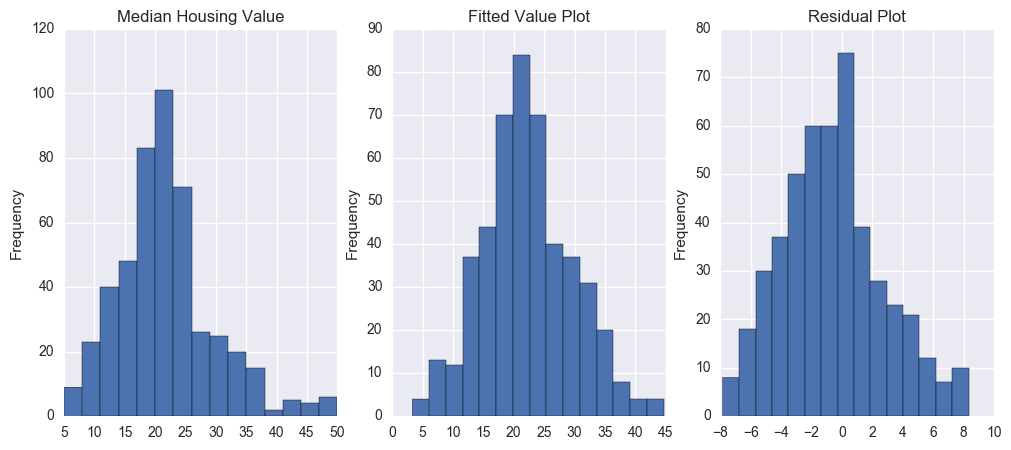

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

residtrim.Medvalue.plot(kind = 'hist', bins = 15, ax = ax1)
ax1.set_title('Median Housing Value')

residtrim.predvalue.plot(kind = 'hist', bins = 15, ax = ax2)
ax2.set_title('Fitted Value Plot')

residtrim.residual.plot(kind = 'hist', bins = 15, ax = ax3)
ax3.set_title('Residual Plot');

### Evaluation of the histograms:

After removing outliers from the original dataset, we definitely see improvements on the histograms; especially in the residual plot. In fact, it seems now residual plot is approximately normal. 

Plotting a normal probability plots of the predicted values and the residuals, we use the following python commands.

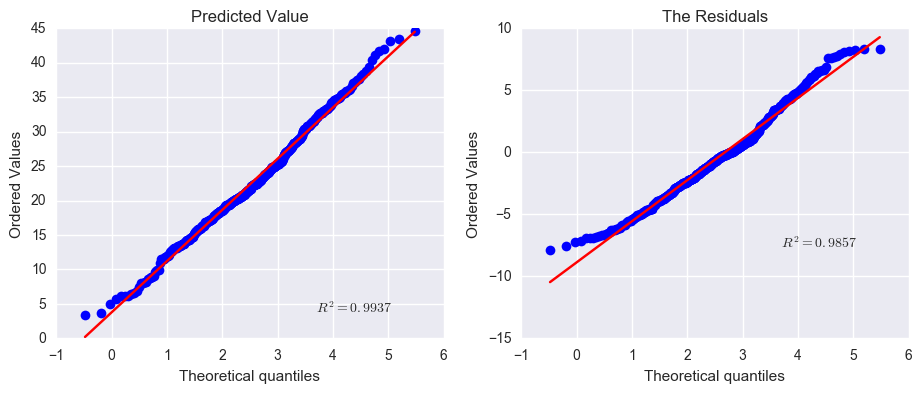

In [25]:
fig = plt.figure(figsize = (11, 4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(residtrim.predvalue, dist = 'norm', plot = ax, sparams = (2.5, ), rvalue = True)
ax.set_title('Predicted Value')

stats.probplot(residtrim.residual, dist = 'norm', plot = ax1, sparams = (2.5, ), rvalue = True)
ax1.set_title('The Residuals');

Since all the predicted values are very closely squeezed to the line of best fit, the red line, the distribution of the predicted values is normal. This result agrees with the previous histogram of the predicted values. 

It is clear that the distribution of the residuals plot has improved; now, it seems normal. However, we must re-evaluate to see whether the modified dataset has any outliers. With the following python commands, we can achieve this.

In [26]:
IQR = residtrim.residual.quantile(.75) - residtrim.residual.quantile(.25)
lower = residtrim.residual.quantile(0.25) - 1.5*IQR
lower

-8.5972527187940884

In [27]:
upper = residtrim.residual.quantile(0.75) + 1.5*IQR
upper

6.9234070836446513

Note that any residual value less than -8.597 and greater than 6.923 are considered outliers. With the following python command we are going to see if there are any outliers in this trimed dataset.

In [28]:
residtrim.sort_values('residual', axis = 0, ascending = True, inplace = True)
residtrim.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,18.473228,-7.573228
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,20.300980,-7.200980
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,30.752704,-7.152704
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,20.232837,-6.932837


In [29]:
residtrim.tail()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
148,2.33099,0.0,0,0.871,5.186,1.5296,5,403.0,14.7,356.99,28.32,17.8,9.741287,8.058713
157,1.22358,0.0,0,0.605,6.943,1.8773,5,403.0,14.7,363.43,4.59,41.3,33.103752,8.196248
4,0.06905,0.0,0,0.458,7.147,6.0622,3,222.0,18.7,396.90,5.33,36.2,27.982641,8.217359
163,1.51902,0.0,1,0.605,8.375,2.1620,5,403.0,14.7,388.45,3.32,50.0,41.705425,8.294575
181,0.06888,0.0,0,0.488,6.144,2.5979,3,193.0,17.8,396.90,9.45,36.2,27.860109,8.339891


# Step Five:

Clearly, we can still see some outliers in the upper tail; we must see, how many outliers there are.

In [30]:
residtrim[residtrim.residual < lower].shape

(0, 14)

In [31]:
residtrim[residtrim.residual > upper].shape

(10, 14)

There are no data points left below the lower limit; but certainly, there are 10 observations above the upper limit. Let's see these 10 rows with the following python command.

In [32]:
residtrim[residtrim.residual > upper]

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
7,0.14455,12.5,0,0.524,6.172,5.9505,5,311.0,15.2,396.90,19.15,27.1,19.503021,7.596979
373,11.10810,0.0,0,0.668,4.906,1.1742,24,666.0,20.2,396.90,34.77,13.8,6.172528,7.627472
409,14.43830,0.0,0,0.597,6.852,1.4655,24,666.0,20.2,179.36,19.78,27.5,19.820179,7.679821
262,0.52014,20.0,0,0.647,8.398,2.2885,5,264.0,13.0,386.86,5.91,48.8,41.058758,7.741242
407,11.95110,0.0,0,0.659,5.608,1.2852,24,666.0,20.2,332.09,12.13,27.9,19.969008,7.930992
148,2.33099,0.0,0,0.871,5.186,1.5296,5,403.0,14.7,356.99,28.32,17.8,9.741287,8.058713
157,1.22358,0.0,0,0.605,6.943,1.8773,5,403.0,14.7,363.43,4.59,41.3,33.103752,8.196248
4,0.06905,0.0,0,0.458,7.147,6.0622,3,222.0,18.7,396.90,5.33,36.2,27.982641,8.217359
163,1.51902,0.0,1,0.605,8.375,2.1620,5,403.0,14.7,388.45,3.32,50.0,41.705425,8.294575
181,0.06888,0.0,0,0.488,6.144,2.5979,3,193.0,17.8,396.90,9.45,36.2,27.860109,8.339891


With the following python command, we are going to exclude these 10 outlying data points from the residtrim dataset. To see the first five rows of the new remaining dataset, residtrim1, we use head function.

In [33]:
residtrim1 = residtrim[(residtrim.residual > lower) & (residtrim.residual < upper)]
residtrim1.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,18.473228,-7.573228
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,20.300980,-7.200980
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,30.752704,-7.152704
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,20.232837,-6.932837


To see the shape of the remaining observations of the dataframe, residtrim1, we use the following python command. 

In [34]:
residtrim1.shape

(468, 14)

The remaining dataset contains 468 observations and 14 columns.

### Histograms:

We are going to reproduce the histograms and the normal probability plots of the residuals of residtrim1 dataset.

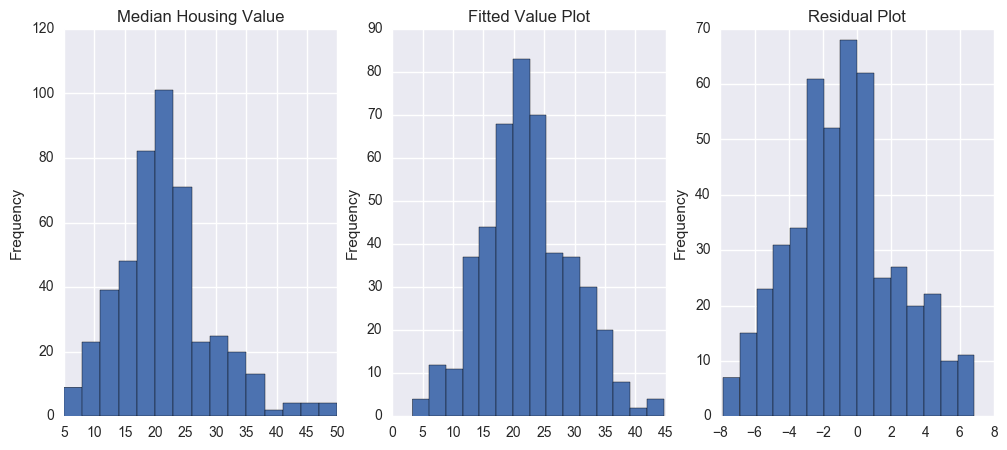

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

residtrim1.Medvalue.plot(kind = 'hist', bins = 15, ax = ax1)
ax1.set_title('Median Housing Value')

residtrim1.predvalue.plot(kind = 'hist', bins = 15, ax = ax2)
ax2.set_title('Fitted Value Plot')

residtrim1.residual.plot(kind = 'hist', bins = 15, ax = ax3)
ax3.set_title('Residual Plot');

### Normal probability plot:

With the following python commands, we plot normal probability plots of the fitted values and the residuals.

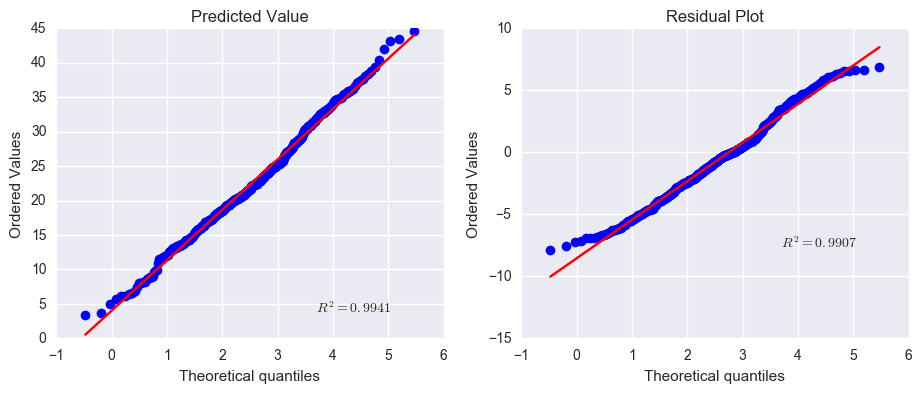

In [36]:
fig = plt.figure(figsize = (11,4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(residtrim1.predvalue, dist = 'norm', plot = ax, sparams = (2.5, ), rvalue = True)
ax.set_title('Predicted Value')

stats.probplot(residtrim1.residual, dist = 'norm', plot = ax1, sparams = (2.5, ), rvalue = True)
ax1.set_title('Residual Plot');

The residual plot has improved and the r-squared has improved too. Let see if there is any outliers exist.

In [37]:
IQR = residtrim1.residual.quantile(.75) - residtrim1.residual.quantile(.25)
lower = residtrim1.residual.quantile(0.25) - 1.5*IQR
lower

-8.4295710007100872

In [38]:
upper = residtrim1.residual.quantile(0.75) + 1.5*IQR
upper

6.5644232113361278

Any residual values less than -8.43 or greater than 6.56 are considered outliers. With the following python command, we can see if there are any extreme values according to these limits. 

In [39]:
residtrim1[residtrim1.residual < lower]

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual


In [40]:
residtrim1[residtrim1.residual > upper]

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
257,0.61154,20.0,0,0.6470,8.704,1.8010,5,264.0,13.0,389.70,5.12,50.0,43.379033,6.620967
280,0.03578,20.0,0,0.4429,7.820,4.6947,5,216.0,14.9,387.31,3.76,45.4,38.763258,6.636742
204,0.02009,95.0,0,0.4161,8.034,5.1180,4,224.0,14.7,390.55,2.88,50.0,43.136101,6.863899


# Step Six:

There are three extreme observations on the upper limit, outliers; we are going to remove them. And we are going to print first five rows of the dataset, residtrim2 with the head function.

In [41]:
residtrim2 = residtrim1[(residtrim1.residual > lower) & (residtrim1.residual < upper)]
residtrim2.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,18.473228,-7.573228
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,20.300980,-7.200980
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,30.752704,-7.152704
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,20.232837,-6.932837


With the following python command, we see the shape this dataset, residtrim2.

In [42]:
residtrim2.shape

(465, 14)

This dataset, residtrim2, contains 465 observations and 14 columns.

### Histograms:

We are going to reproduce the histograms and the normal probability plots of the residuals of residtrim2 dataset.

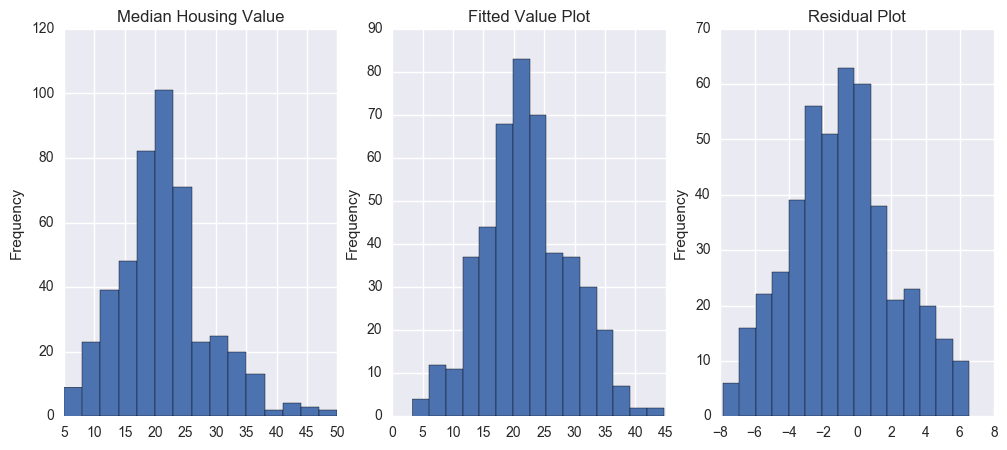

In [43]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

residtrim2.Medvalue.plot(kind = 'hist', bins = 15, ax = ax1)
ax1.set_title('Median Housing Value')

residtrim2.predvalue.plot(kind = 'hist', bins = 15, ax = ax2)
ax2.set_title('Fitted Value Plot')

residtrim2.residual.plot(kind = 'hist', bins = 15, ax = ax3)
ax3.set_title('Residual Plot');

### Normal probability plot:

With the following python commands, we plot the normal probability plots of the fitted values and the residuals of the residtrim2.

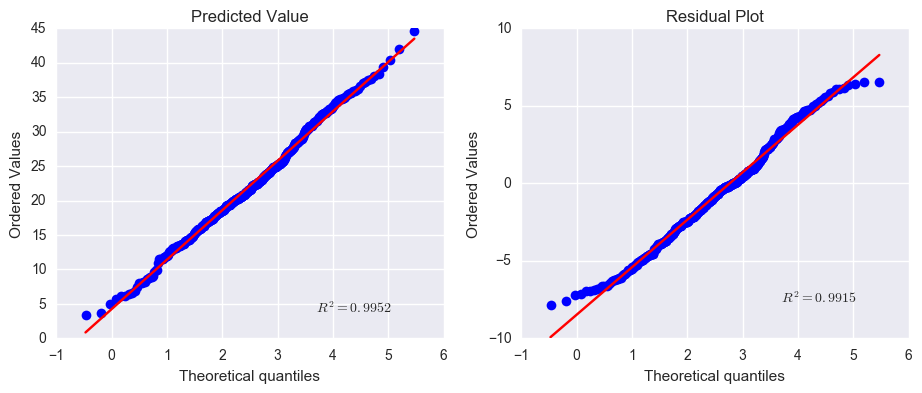

In [44]:
fig = plt.figure(figsize = (11,4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(residtrim2.predvalue, dist = 'norm', plot = ax, sparams = (2.5, ), rvalue = True)
ax.set_title('Predicted Value')

stats.probplot(residtrim2.residual, dist = 'norm', plot = ax1, sparams = (2.5, ), rvalue = True)
ax1.set_title('Residual Plot');

We don't see any specific improvements in the residual plot; however, we are going to recheck if there are any more extreme values left in this dataset.

In [45]:
IQR = residtrim2.residual.quantile(.75) - residtrim2.residual.quantile(.25)
lower = residtrim2.residual.quantile(0.25) - 1.5*IQR
lower

-8.4460312896535576

In [46]:
upper = residtrim2.residual.quantile(0.75) + 1.5*IQR
upper

6.5302478934722963

In [47]:
residtrim2[residtrim2.residual < lower].copy()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual


In [48]:
residtrim2[residtrim2.residual > upper].copy()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
256,0.01538,90.0,0,0.394,7.454,6.3361,3,244.0,15.9,386.34,3.11,44.0,37.43791,6.56209


# Step Seven:

Still there is one extreme record in the upper limit. We will remove this single row from the dataset and recheck.

In [49]:
residtrim3 = residtrim2[(residtrim2.residual > lower) & (residtrim2.residual < upper)]
residtrim3.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,18.473228,-7.573228
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,20.300980,-7.200980
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,30.752704,-7.152704
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,20.232837,-6.932837


Let see the shape this new dataset, residtrim3.

In [50]:
residtrim3.shape

(464, 14)

This dataset, residtrim3 contains 464 rows with 14 columns.

### Histograms:

We are going to reproduce histograms and normal probability plots of the residuals of residtrim3 dataset.

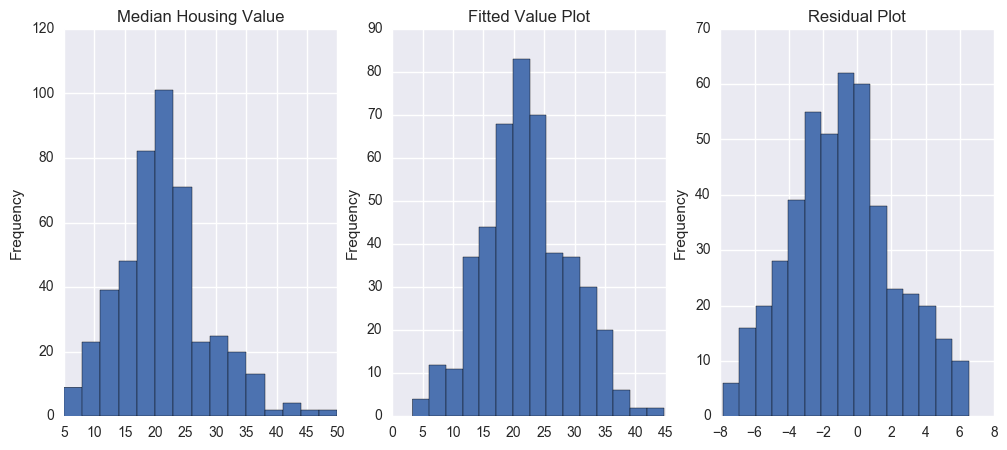

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

residtrim3.Medvalue.plot(kind = 'hist', bins = 15, ax = ax1)
ax1.set_title('Median Housing Value')

residtrim3.predvalue.plot(kind = 'hist', bins = 15, ax = ax2)
ax2.set_title('Fitted Value Plot')

residtrim3.residual.plot(kind = 'hist', bins = 15, ax = ax3)
ax3.set_title('Residual Plot');


### Normal probability plot:

With the following python commands, we produce the normal probability plots of the fitted values and the residuals.

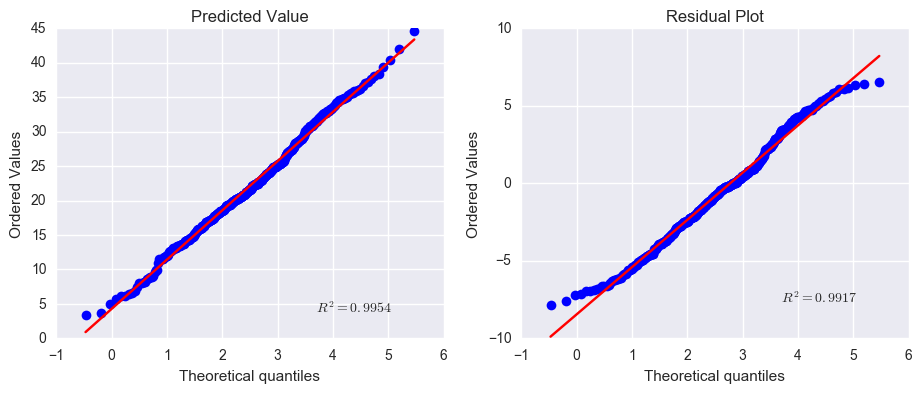

In [52]:
fig = plt.figure(figsize = (11,4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(residtrim3.predvalue, dist = 'norm', plot = ax, sparams = (2.5, ), rvalue = True)
ax.set_title('Predicted Value')

stats.probplot(residtrim3.residual, dist = 'norm', plot = ax1, sparams = (2.5, ), rvalue = True)
ax1.set_title('Residual Plot');

We don't really see any changes in the residual plots but we can still check with the numerical values.

In [53]:
IQR = residtrim3.residual.quantile(.75) - residtrim3.residual.quantile(.25)
lower = residtrim3.residual.quantile(0.25) - 1.5*IQR
lower

-8.4680274488420508

In [54]:
upper = residtrim3.residual.quantile(0.75) + 1.5*IQR
upper

6.5300490501240818

In [55]:
residtrim3[residtrim3.residual < lower].copy()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual


In [56]:
residtrim3[residtrim3.residual > upper].copy()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual


# Step Eight:

This will be our final model now, since we don't see any outliers or extreme values.

Let print out the first five rows of the dataset residtrim3.

In [57]:
residtrim3.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,16.346933,-7.846933
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,18.473228,-7.573228
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,20.300980,-7.200980
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,30.752704,-7.152704
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,20.232837,-6.932837


With the following python commands, we produce the residuals versus the fitted values or the crime rate values.

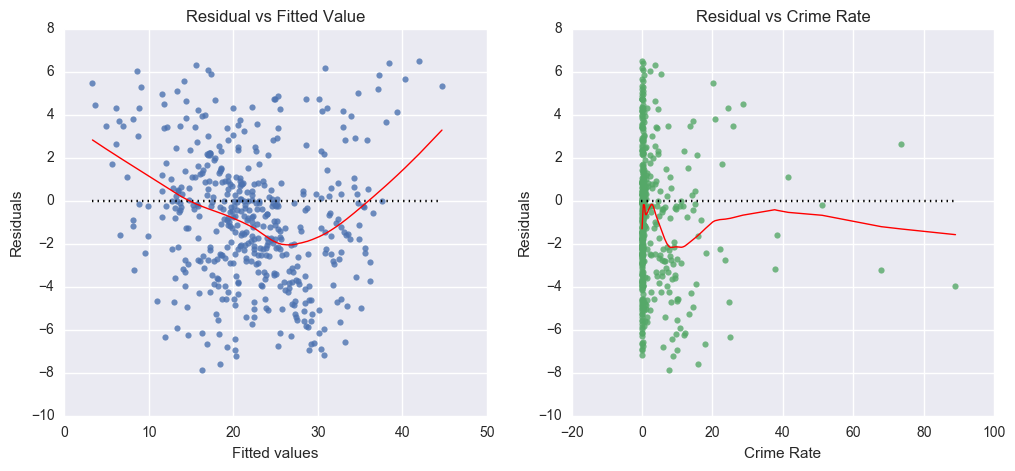

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(residtrim3.predvalue, residtrim3.residual, lowess = True, 
            ax = ax1, line_kws = {'color':'r', 'lw':1})

ax1.hlines(0, xmin = ax1.xaxis.get_data_interval()[0],
           xmax = ax1.xaxis.get_data_interval()[1], 
           linestyles = 'dotted')
ax1.set_title('Residual vs Fitted Value')

# Right plot
sns.regplot(residtrim3.crime_rate, residtrim3.residual, lowess = True,
            line_kws = {'color':'r', 'lw':1}, ax = ax2)
ax2.hlines(0, xmin = ax2.xaxis.get_data_interval()[0],
           xmax = ax2.xaxis.get_data_interval()[1], 
           linestyles = 'dotted')
ax2.set_title('Residual vs Crime Rate')

for ax in fig.axes:
    ax1.set_xlabel('Fitted values')
    ax2.set_xlabel('Crime Rate')
    ax.set_ylabel('Residuals');

Both of about plots still shows some curvature pattern, so it requires some transformation. 

In [59]:
model3 = ols("Medvalue ~ crime_rate + land_zone + charles_river + nox + rooms + \
            distance + radial_high + tax + PTratio + black + Lstatus", residtrim3).fit()

The following python command shows the summary of the model3.

In [60]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Medvalue   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     226.9
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          3.26e-176
Time:                        14:29:18   Log-Likelihood:                -1148.9
No. Observations:                 464   AIC:                             2322.
Df Residuals:                     452   BIC:                             2372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        22.3868      3.594      6.230

Model really improve after removing all outliers. With the following python commands, we slice out the fitted values and the residuals of the model3. 

In [61]:
pred1 = model3.fittedvalues
resid1 = model3.resid

With the following python command, we print out the first 12 columns of the DataFrame and called this object df; and used head function to print first five rows of the DataFrame df.

In [62]:
df = residtrim3.iloc[:, 0:12]
df.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3


With the following python commands, we attach the predicted and the residual objects to the df DataFrame; and prints first five rows of the df DataFrame.

In [63]:
df['predvalue'] = pred1
df['residual'] = resid1
df.head()

,crime_rate,land_zone,charles_river,nox,rooms,distance,radial_high,tax,PTratio,black,Lstatus,Medvalue,predvalue,residual
397,7.67202,0.0,0,0.693,5.747,1.6334,24,666.0,20.2,393.10,19.92,8.5,14.887649,-6.387649
381,15.87440,0.0,0,0.671,6.545,1.5192,24,666.0,20.2,396.90,21.08,10.9,17.268944,-6.368944
395,8.71675,0.0,0,0.693,6.471,1.7257,24,666.0,20.2,391.98,17.12,13.1,18.871724,-5.771724
88,0.05660,0.0,0,0.489,7.007,3.4217,2,270.0,17.8,396.90,5.50,23.6,29.477330,-5.877330
377,9.82349,0.0,0,0.671,6.794,1.3580,24,666.0,20.2,396.90,21.24,13.3,19.051376,-5.751376


### Residual Plots:

The following python commands will produce the residuals versus the fitted values or the crime rate values plots.

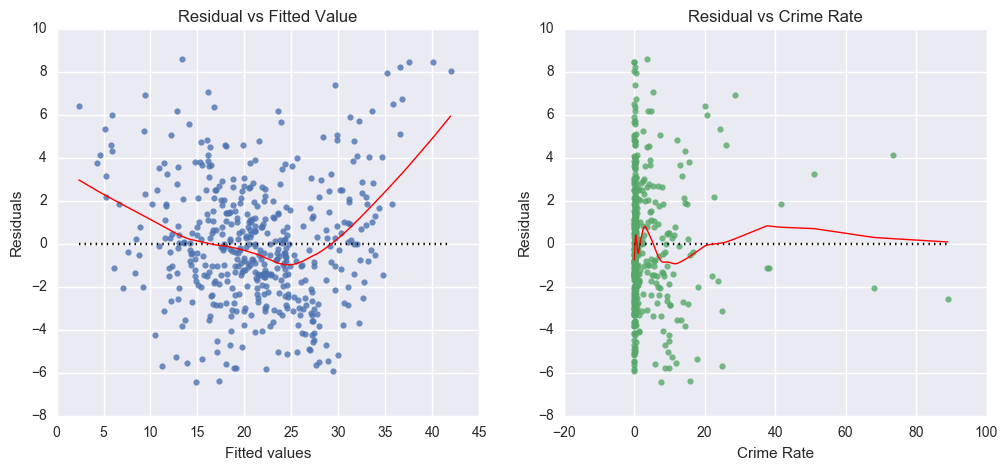

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(df.predvalue, df.residual, lowess = True, 
            ax = ax1, line_kws = {'color':'r', 'lw':1})

ax1.hlines(0, xmin = ax1.xaxis.get_data_interval()[0],
           xmax = ax1.xaxis.get_data_interval()[1], 
           linestyles = 'dotted')
ax1.set_title('Residual vs Fitted Value')

# Right plot
sns.regplot(df.crime_rate, df.residual, lowess = True,
            line_kws = {'color':'r', 'lw':1}, ax = ax2)
ax2.hlines(0, xmin = ax2.xaxis.get_data_interval()[0],
           xmax = ax2.xaxis.get_data_interval()[1], 
           linestyles = 'dotted')
ax2.set_title('Residual vs Crime Rate')

for ax in fig.axes:
    ax1.set_xlabel('Fitted values')
    ax2.set_xlabel('Crime Rate')
    ax.set_ylabel('Residuals');

To see shape of df, we use following python command.

In [65]:
df.shape

(464, 14)

### The Histograms:

The histograms of the median house values, the fitted values, and the residuals.

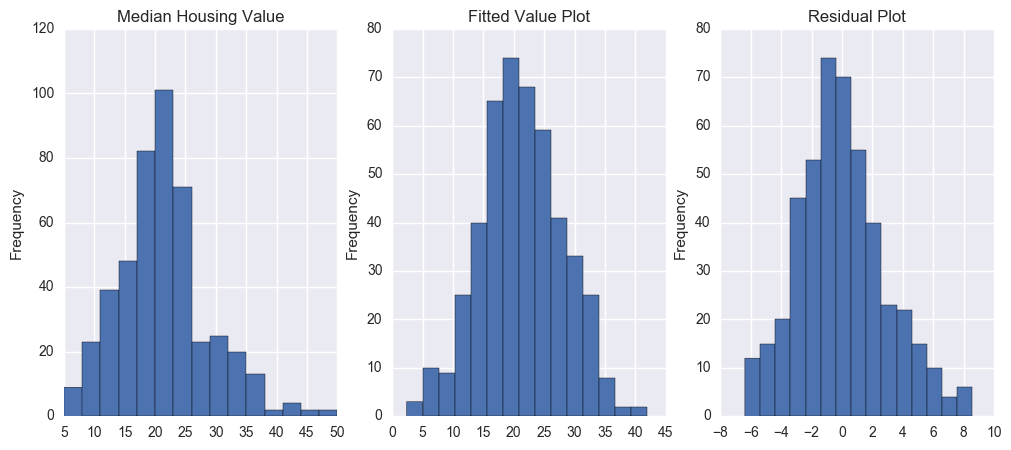

In [66]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,5))

df.Medvalue.plot(kind = 'hist', bins = 15, ax = ax1)
ax1.set_title('Median Housing Value')

df.predvalue.plot(kind = 'hist', bins = 15, ax = ax2)
ax2.set_title('Fitted Value Plot')

df.residual.plot(kind = 'hist', bins = 15, ax = ax3)
ax3.set_title('Residual Plot');

All three above histograms are appromaxitely bell shape except first histogram to the left may somewhat skewed to the right.

### The normal probability plots:

The following python commands produces the normal probability plots of the predicted values and the residuals.

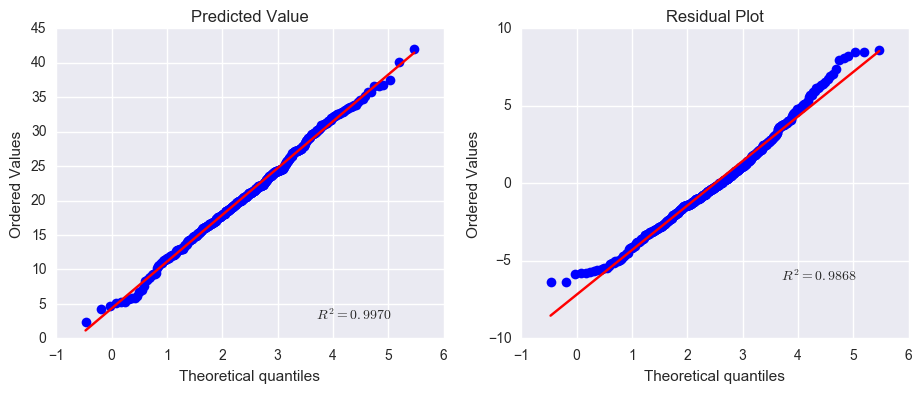

In [69]:
fig = plt.figure(figsize = (11,4))

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

stats.probplot(df.predvalue, dist = 'norm', plot = ax, sparams = (2.5, ), rvalue = True, fit = True)
ax.set_title('Predicted Value')

stats.probplot(df.residual, dist = 'norm', plot = ax1, sparams = (2.5, ), rvalue = True, fit = True)
ax1.set_title('Residual Plot');

Both of above plots have shown that the distribution of the residauls and the predicted values are normally distributed. No outlier!